<a href="https://colab.research.google.com/github/ananya-carpediem08/AIMLMonth2023/blob/main/Titanic_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!wget https://www.dropbox.com/s/ykjdfve0ogfzui2/titanic.csv

--2023-08-24 20:03:11--  https://www.dropbox.com/s/ykjdfve0ogfzui2/titanic.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ykjdfve0ogfzui2/titanic.csv [following]
--2023-08-24 20:03:11--  https://www.dropbox.com/s/raw/ykjdfve0ogfzui2/titanic.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2834d5dbe09e59c255ba7f0cef.dl.dropboxusercontent.com/cd/0/inline/CCZfpEuQVicm80pD-519hmMGv-tRn0IUCM860u9C0amEoWjLyn4vXYD_xYCjrcX2CksmWwTsskUlqQaTM78NnZXAtlE6p3eZgVSOpWbkpAhcCgfZBahCxZ-dpjocXscw6cp8Gg-7Q5lx1nI2a5jjRtPE/file# [following]
--2023-08-24 20:03:12--  https://uc2834d5dbe09e59c255ba7f0cef.dl.dropboxusercontent.com/cd/0/inline/CCZfpEuQVicm80pD-519hmMGv-tRn0IUCM860u9C0amEoWjLyn4vXYD_xYCjrcX2CksmWwTsskUlqQaTM78NnZXAtlE6p3eZgVSOpWbkp

In [35]:
import numpy as np
import pandas as pd

In [36]:
titanic = pd.read_csv('titanic.csv')

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#cleaning the dataset

titanic = titanic.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [39]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [40]:
# check for missing values
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [41]:
# we are upadting the nan values of Age column with the average age of passengers

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [42]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

GRAPHICAL ANALYSIS OF DATA

In [43]:
import matplotlib.pyplot as plt

Encoding data


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])

In [45]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


### Data is cleaned and preprocessed. We have performed feature engineering as well


In [46]:
#splitting data into train(80%) and test(20%)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(columns=['Survived']),
                                                    titanic['Survived'], test_size=0.2, random_state=42)

Model Selection

1.Decision Tree




In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(criterion='entropy')

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
y_pred = model.predict(X_test)

In [53]:
y_pred[:5]

array([0, 0, 0, 1, 1])

In [54]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [55]:
model.score(X_test, y_test)

0.776536312849162

In [56]:
model.score(X_train, y_train)

0.9803370786516854

In [57]:
model.predict([[2.0, 1, 28.0, 1.0, 0.0, 14.98]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [58]:
import pickle
# now you can save it to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [59]:
model.tree_.max_depth

23

In [60]:
from sklearn import tree

In [61]:
model = DecisionTreeClassifier(criterion='entropy', max_depth = 8)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [62]:
model.score(X_test, y_test)

0.8212290502793296

In [63]:
model.score(X_train, y_train)

0.8918539325842697

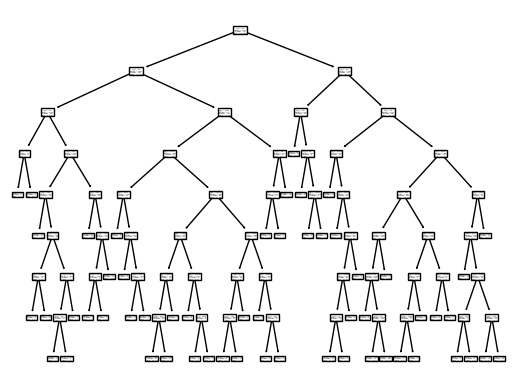

In [64]:
tree.plot_tree(model);

# RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth = 11)

In [67]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=1000)

In [68]:
rfc.score(X_test, y_test)

0.8044692737430168

In [69]:
rfc.score(X_train, y_train)

0.9466292134831461

In [70]:
rfc.estimators_[:5]

[DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=1575748368),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=1969992257),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=686448940),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=754320449),
 DecisionTreeClassifier(max_depth=11, max_features='sqrt',
                        random_state=699075136)]

# Boosting Code

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbdt = GradientBoostingClassifier(n_estimators = 300)

In [73]:
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300)

In [74]:
gbdt.score(X_test, y_test)

0.8268156424581006

In [75]:
gbdt.score(X_train, y_train)

0.9424157303370787